## Consigna 1er Parcial Computación III - Recuperatorio tema personalizado
Carrera Física Aplicada, INSPT UTN<br>
resuelto por Daiana Dominikow. Agosto 2024.

# Campo Magnético en una bobina - Método de MonteCarlo.
Se te ha dado una bobina cilíndrica con las siguientes características<br>

Radio de la bobina $R = 0.1m$<br>

Número de vueltas $ N = 50$<br>
Corriente a través de la bobina $I = 2.0A$<br>


### La ley de Biot-Savart 
para un elemento de corriente $d\mathbf{I}$ en un punto $\mathbf{r}'$ que contribuye a un campo magnético $d\mathbf{B}$ en un punto $\mathbf{r}$ es dada por:
\begin{equation}
   d\mathbf{B} = \frac{\mu_0}{4 \pi} \frac{d\mathbf{I} \times (\mathbf{r} - \mathbf{r}')}{|\mathbf{r} - \mathbf{r}'|^3}
\end{equation}

Donde $\mathbf{r}$ es la posición del punto donde se mide el campo magnético y $\mathbf{r}'$ es la posición del elemento de corriente.<br>
Si consideramos una espira de radio $R$ en el plano $xy$ y calculamos el campo magnético en un punto en el eje $z$ a una distancia $z$ del centro, la posición del elemento de corriente $d\mathbf{I}$ en la espira es $(R \cos \theta, R \sin \theta, 0)$ y el punto donde medimos el campo es $(0, 0, z)$.<br>
Me voy a ahorrar el desarrollo matemático que vimos en Física 2 de esto, para dejar por acá entonces el campo que cada punto que caiga dentro de la bobina debe contabilizar.

\begin{equation}
dB = \frac{\mu_0 I R^2}{2 (R^2 + \sqrt{(x^2+ y^2)})^{3/2} * n}
\end{equation}   

Donde $n$ es la cantidad de iteraciones y   $\mu_0$ es la permeabilidad del vacío <br>

\begin{equation}
\mu_0 = 4 \pi \times 10^{-7} \, \text{T} \cdot \text{m/A}
\end{equation}





La consigna consta de calcular el campo magnético en el centro de la bobina utilizando el método de Montecarlo. Para ello, se sugiere que realices los siguientes pasos:<br>


* Genera un conjunto de puntos aleatorios en el plano $z=0$ dentro de un cuadrado que abarque el área de la bobina, es decir, dentro del intervalo $ [−0.1 , 0.1] $ para ambas coordenadas $x$ e $y$. Andá probando como te vá dando con diferentes cantidades. <br>


* Calculá el campo magnético en cada uno de los puntos generados usando la fórmula aproximada para el campo magnético en el centro de una bobina cilíndrica. En criollo, definite una función campo magnético que devuelva el valor para cada punto que caiga dentro de la bobina. 

* Promedia los valores del campo magnético en todos los puntos generados para obtener una estimación del campo magnético en el centro de la bobina.

* Comenta sobre la precisión del método utilizado y qué aspectos podrían mejorar la estimación del campo magnético.



Campo magnético analíticamente en el centro de la bobina: B = 0.000628 T
Campo magnético en el centro de la bobina MC: B = 0.000041 T


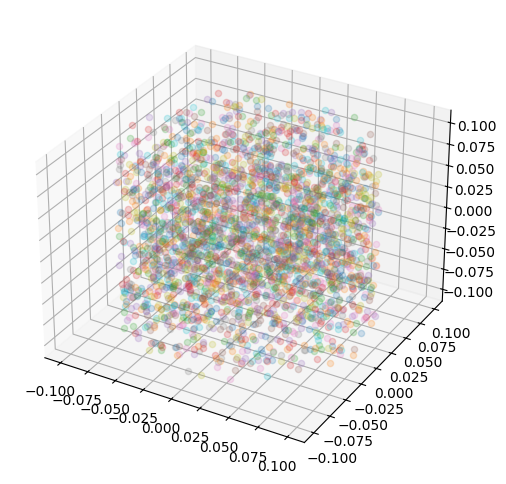

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')


# Parámetros de la bobina
R = 0.1  # Radio de la bobina en metros
N = 50   # Número de vueltas
I = 2.0  # Corriente en amperios

# Número de puntos aleatorios
n = 3000
i = 0

# Permeabilidad del vacío
mu0 = 4 * np.pi * 1e-7  

B = 0

# Creo mi función 'campo magnético'
def campo_magnetico(R,x,y, N,I):
    # Fórmula aproximada para el campo magnético dentro de una bobina circular
    dB = (N*  mu0 * I * R**2) / (2 * (R**2 + (x**2 + y**2)**(1/2))**(3/2))
    return dB


while i < n:    
    x = R *(np.random.random() * 2 - 1)
    y = R *(np.random.random() * 2 - 1)
    z = R *(np.random.random() * 2 - 1)
    
    if np.sqrt(x**2 + y**2) <= R  :
        B += campo_magnetico(R,x,y, N,I) / n
        i +=1
        ax.scatter(x,y,z, alpha=0.2)

        
B_exact =  N* (mu0 *  I) / (2 * R)
print(f"Campo magnético analíticamente en el centro de la bobina: B = {B_exact :.6f} T")
print(f"Campo magnético en el centro de la bobina MC: B = {B :.6f} T")